In [3]:
!which python 
!whoami 
!hostname
!pwd

/home/farshed.abdukhakimov/miniconda3/envs/main/bin/python


farshed.abdukhakimov
gpu-10
/home/farshed.abdukhakimov/projects/sania


In [4]:
import os
import sys
import urllib.request
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, SubsetRandomSampler
import torch.utils.data as data_utils
import torch.optim as optim

import torchvision
import torchvision.models as models

from sklearn.datasets import load_svmlight_file

import matplotlib.pyplot as plt

import experiments.loss_functions as lf
from experiments.utils import load_results, save_results
from experiments.datasets import get_MNIST, get_CIFAR10, get_FashionMNIST

# import scipy
# import optuna 

from dotenv import load_dotenv
load_dotenv()

torch.set_default_dtype(torch.float64)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [46]:
train_loader, test_loader = get_FashionMNIST(128, 128, 0)

torch.Size([1, 28, 28])
tensor(3)


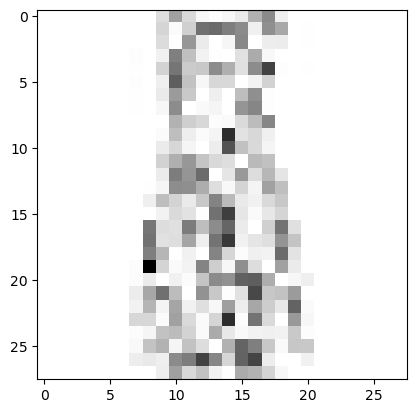

In [47]:
# torch.manual_seed(0)
for d, t in train_loader:
    print(d[0].shape)
    print(t[0])
    img = d[0].squeeze()
    npimg = img.numpy()
    plt.imshow(npimg, cmap="Greys")
    plt.show()
    break

In [48]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(320, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 320)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

# class LeNet5(nn.Module):
#     def __init__(self):
#         super(LeNet5, self).__init__()
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size = 2, stride = 2))
#         self.fc = nn.Linear(400, 120)
#         self.relu = nn.ReLU()
#         self.fc1 = nn.Linear(120, 84)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(84, 10)
        
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.reshape(out.size(0), -1)
#         out = self.fc(out)
#         out = self.relu(out)
#         out = self.fc1(out)
#         out = self.relu1(out)
#         out = self.fc2(out)
#         return out

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        return y
    
class LeNet5X(nn.Module):
    def __init__(self):
        super(LeNet5X, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(256, 256)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(128, 84)
        self.relu5 = nn.ReLU()
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        y = self.conv1(x)
        y = self.relu1(y)
        y = self.pool1(y)
        y = self.conv2(y)
        y = self.relu2(y)
        y = self.pool2(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = self.relu3(y)
        y = self.fc2(y)
        y = self.relu4(y)
        y = self.fc3(y)
        y = self.relu5(y)
        y = self.fc4(y)
        return y

In [53]:
torch.random.manual_seed(0)
model = LeNet5X()
w0 = [w+0.0 for w in model.parameters()]
d = np.sum([w.numel() for w in model.parameters()])
print ("Total parameters",d)  

Total parameters 112946


In [15]:
torch.random.manual_seed(0)
model = LeNet5()
w0 = [w+0.0 for w in model.parameters()]
d = np.sum([w.numel() for w in model.parameters()])
print ("Total parameters",d)  

Total parameters 44426


In [20]:
a = models.resnet18(num_classes=10)

for d, t in train_loader:
    out = a(d)
    print(len(out[0]))
    break

10


In [19]:
def eval_model(model, criterion, test_loader, test_hist) -> None: 
    test_epoch_loss = 0.0
    total = 0
    correct = 0
    for i, (batch_data, batch_target) in enumerate(test_loader):
        batch_data = batch_data.to(device)
        batch_target = batch_target.to(device)
        
        outputs = model(batch_data)
        loss = criterion(outputs, batch_target)
        test_epoch_loss += loss.item() * batch_data.size(0)
        
        
        _, predicted = torch.max(outputs.data, 1)
        total += batch_target.size(0)
        batch_correct = (predicted == batch_target).sum().item()
        batch_accuracy = batch_correct / batch_target.size(0)
        correct += batch_correct
        
        test_hist["batch_loss"].append(loss.item())
        test_hist["batch_accuracy"].append(batch_accuracy)

    test_hist["epoch_loss"].append(test_epoch_loss / len(test_loader.sampler))
    test_hist["epoch_accuracy"].append(correct / total)

In [20]:
def run_optimizer(model, opt, lr, train_loader, test_loader, epochs, seed=0):

    torch.manual_seed(seed)

    optimizer = opt(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    train_hist = {
        "epoch_loss": [],
        "batch_loss": [],
    }
    
    test_hist = {
        "epoch_accuracy": [],
        "batch_accuracy": [],
        "epoch_loss": [],
        "batch_loss": [],
    }
    

    for epoch in range(epochs):
        
        print(f"Epoch: [{epoch}]")
        
        model.eval()
        with torch.inference_mode():
            eval_model(model, criterion, test_loader, test_hist)
            print(f"Test accuracy: {test_hist['epoch_accuracy'][-1]}")
        
        
        train_epoch_loss = 0.0
        model.train()
        for i, (batch_data, batch_target) in enumerate(train_loader): 
            
            batch_data = batch_data.to(device)
            batch_target = batch_target.to(device)
            
            optimizer.zero_grad()

            outputs = model(batch_data)
            loss = criterion(outputs, batch_target)
            train_epoch_loss += loss.item() * batch_data.size(0)

            loss.backward()
            optimizer.step()
            
            train_hist["batch_loss"].append(loss.item())
            
        train_epoch_loss = train_epoch_loss / len(train_loader.sampler)
        train_hist["epoch_loss"].append(train_epoch_loss)
        print(f"Train loss: {train_epoch_loss:.4f}")

    return {
        "train_hist": train_hist,
        "test_hist": test_hist,
        "model_state_dict": model.state_dict()
    }

In [21]:
# model = models.resnet18(num_classes=10).to(device)
model = LeNet5X().to(device)
adam_hist = run_optimizer(model, optim.Adam, 0.01, train_loader, test_loader, 3, 0)

Epoch: [0]
Test accuracy: 0.0726
Train loss: 0.6109
Epoch: [1]
Test accuracy: 0.8398
Train loss: 0.4154
Epoch: [2]
Test accuracy: 0.8482
Train loss: 0.3767


In [22]:
def sania_adagrad(model, precond_method, train_loader, test_loader, epochs, seed=0):
    
    torch.manual_seed(seed)

    criterion = nn.CrossEntropyLoss()

    train_hist = {  
        "epoch_loss": [],
        "batch_loss": [],
    }
    test_hist = {
        "epoch_accuracy": [],
        "batch_accuracy": [],
        "epoch_loss": [],
        "batch_loss": [],
    }

    grad_sums = [torch.zeros_like(p) for p in model.parameters()]
    s = [torch.zeros_like(p) for p in model.parameters()]
    
    assert precond_method in ("adagrad_sqr", "adagrad")
    
    eps = torch.tensor(0.5)

    for epoch in range(epochs):
        
        print(f"Epoch: [{epoch}]")
                
        model.eval()
        with torch.inference_mode():
            eval_model(model, criterion, test_loader, test_hist)
            print(f"Test accuracy: {test_hist['epoch_accuracy'][-1]}")
            
        train_epoch_loss = 0.0
        model.train()
        for i, (batch_data, batch_target) in enumerate(train_loader): 
            
            batch_data = batch_data.to(device)
            batch_target = batch_target.to(device)
            
            for p in model.parameters():
                p.grad = None
            
            outputs = model(batch_data)
            loss = criterion(outputs, batch_target)
            train_epoch_loss += loss.item() * batch_data.size(0)
            
            loss.backward()
            
            # Sum of squared gradients 
            for v, p in zip(grad_sums, model.parameters()):
                v.add_(torch.square(p.grad))
                
            # Gradient direction preconditioned by Adagrad 
            preconditioned_grads = []
            for v, p in zip(grad_sums, model.parameters()):
                grad_sum_regularized = torch.maximum(torch.ones_like(v) * eps, v)

                if precond_method == "adagrad":
                    t = p.grad / torch.sqrt(grad_sum_regularized)
                elif precond_method == "adagrad_sqr":
                    t = p.grad / grad_sum_regularized
                preconditioned_grads.append(t)

            
            # Scaled norm of gradients ||g||_{inv(B_t)}
            grad_norm_sq_scaled = torch.tensor(0.0).to(device)
            for s, p in zip(preconditioned_grads, model.parameters()):
                grad_norm_sq_scaled.add_(s.mul(p.grad).sum())
                

            # Polyak step size
            step_size = 1.0 
            if 2 * loss.item() <= grad_norm_sq_scaled:
                c = loss.item() / ( grad_norm_sq_scaled )
                det = 1 - 2 * c
                if det > 0.0:
                    step_size = (1 - torch.sqrt(det)).item()
                    
            # optimization step
            with torch.no_grad():
                for s, p in zip(preconditioned_grads, model.parameters()):
                    p.sub_(s, alpha=step_size)
                    
            train_hist["batch_loss"].append(loss.item())
            
        train_epoch_loss = train_epoch_loss / len(train_loader.sampler)
        train_hist["epoch_loss"].append(train_epoch_loss)
        print(f"Train loss: {train_epoch_loss:.4f}")
                    
    return {
        "train_hist": train_hist,
        "test_hist": test_hist,
        "model_state_dict": model.state_dict()
    }

In [23]:
def sania_adam(model, precond_method, train_loader, test_loader, epochs, seed=0):
    
    torch.manual_seed(seed)

    criterion = nn.CrossEntropyLoss()

    train_hist = {  
        "epoch_loss": [],
        "batch_loss": [],
    }
    test_hist = {
        "epoch_accuracy": [],
        "batch_accuracy": [],
        "epoch_loss": [],
        "batch_loss": [],
    }

    grad_sums = [torch.zeros_like(p) for p in model.parameters()]
    s = [torch.zeros_like(p) for p in model.parameters()]

    assert precond_method in ("adam_sqr", "adam")
    
    eps = torch.tensor(0.5)
    betas = (0.9, 0.999)
    step_t = torch.tensor(0.)

    for epoch in range(epochs):
        
        print(f"Epoch: [{epoch}]")

        model.eval()
        with torch.inference_mode():
            eval_model(model, criterion, test_loader, test_hist)
            print(f"Test accuracy: {test_hist['epoch_accuracy'][-1]}")
        
        train_epoch_loss = 0.0
        model.train()
        for i, (batch_data, batch_target) in enumerate(train_loader): 
            
            batch_data = batch_data.to(device)
            batch_target = batch_target.to(device)
            
            for p in model.parameters():
                p.grad = None
            
            outputs = model(batch_data)
            loss = criterion(outputs, batch_target)
            loss.backward()
            train_epoch_loss += loss.item() * batch_data.size(0)
            
            # Sum of squared gradients 
            step_t += 1
            for p, g in zip(model.parameters(), grad_sums):
                g.mul_(betas[1]).add_((1 - betas[1]) * p.grad.data.square())
                
            # Gradient direction preconditioned by Adagrad 
            preconditioned_grads = []
            for v, p in zip(grad_sums, model.parameters()):
                v_hat = v / (1 - torch.pow(betas[1], step_t))
                grad_sum_regularized = torch.maximum(torch.ones_like(v_hat) * eps, v_hat)
                if precond_method == "adam":
                    t = p.grad / torch.sqrt(grad_sum_regularized)
                elif precond_method == "adam_sqr":
                    t = p.grad / grad_sum_regularized
                preconditioned_grads.append(t)
                
            # Scaled norm of gradients ||g||_{inv(B_t)}
            grad_norm_sq_scaled = torch.tensor(0.0).to(device)
            for s, p in zip(preconditioned_grads, model.parameters()):
                grad_norm_sq_scaled.add_(s.mul(p.grad).sum())
                

            # Polyak step size
            step_size = 1.0 
            if 2 * loss.item() <= grad_norm_sq_scaled:
                c = loss.item() / ( grad_norm_sq_scaled )
                det = 1 - 2 * c
                if det > 0.0:
                    step_size = (1 - torch.sqrt(det)).item()
                                
            # optimization step
            with torch.no_grad():
                for s, p in zip(preconditioned_grads, model.parameters()):
                    p.sub_(s, alpha=step_size)
            
            train_hist["batch_loss"].append(loss.item())
            
        train_epoch_loss = train_epoch_loss / len(train_loader.sampler)
        train_hist["epoch_loss"].append(train_epoch_loss)
        print(f"Train loss: {train_epoch_loss:.4f}")
        
    return {
        "train_hist": train_hist,
        "test_hist": test_hist,
        "model_state_dict": model.state_dict()
    }


In [143]:
# def dynamic_sliding_window(x):
def dsw(list_, max_window_size=4):
    
    start = 0
    window_size = 1
    results = []
    mean = lambda x: sum(x) / len(x)

    while True:
        
        if start+window_size > len(list_):
            if start == len(list_): break
            # print(list_[start:])
            results.append(round(mean(list_[start:]), 6))
            break
        else:
            # print(list_[start:start+window_size])
            results.append(round(mean(list_[start:start+window_size]), 6))
        start = start+window_size
        
        if window_size < max_window_size:
            window_size += 1
            


    return results

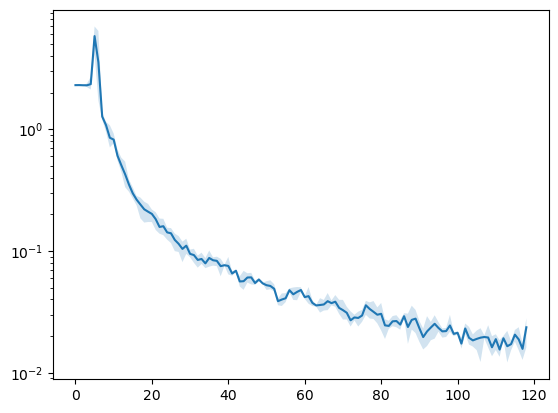

In [146]:
train_loss = [dsw(x["train_hist"]["batch_loss"], 50) for x in all_res]

mean_line = np.mean(train_loss, axis=0)
max_line = np.max(train_loss, axis=0)
min_line = np.min(train_loss, axis=0)

x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])

plt.fill_between(x, max_line, min_line, alpha=0.2) 
plt.semilogy(x, mean_line)

# plt.ylim(bottom=0.9, top=1.0)

In [ ]:
def train_loop(optimizer, loss_function, dataset, batch_size, EPOCHS, seed=0, **kwargs_optimizer):
    torch.manual_seed(seed)

    data, target = dataset
    dataload = TensorDataset(data, target)
    dataloader = DataLoader(dataload, batch_size=batch_size, shuffle=False)    

    # parameters
    w = torch.zeros(data.shape[1], device=device).requires_grad_()
    opt = optimizer([w], **kwargs_optimizer)

    # logging 
    hist = []

    def calc_loss(w, data, target):
        loss = loss_function(w, data, target)
        loss.backward()
        return loss
    
    for epoch in range(EPOCHS):

        loss = loss_function(w, data.to(device), target.to(device))
        g, = torch.autograd.grad(loss, w, create_graph=True)
        print(f"[{epoch}/{EPOCHS}] | Loss: {loss.item()} | GradNorm^2: {(torch.linalg.norm(g) ** 2 ).item()}")
        hist.append([loss.item(), (torch.linalg.norm(g) ** 2).item()])

        for i, (batch_data, batch_target) in enumerate(dataloader):
            batch_data = batch_data.to(device)
            batch_target = batch_target.to(device)
            opt.zero_grad()
            closure = lambda : calc_loss(w, batch_data, batch_target)
            opt.step(closure=closure)
    return hist

